# Initial version of machine learning algo for titanic kaggle competition

In [1]:
import pandas

# We can use the pandas library in python to read in the csv file.
# This creates a pandas dataframe and assigns it to the titanic variable.
titanic = pandas.read_csv("titanic_train.csv")

# Print the first 5 rows of the dataframe.
print(titanic.head(5))

print(titanic.describe()) # Describes only numeric features

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex  Age  SibSp  \
0                            Braund, Mr. Owen Harris    male   22      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38      1   
2                             Heikkinen, Miss. Laina  female   26      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35      1   
4                           Allen, Mr. William Henry    male   35      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
       P

In [2]:
# Before filling missing values
print(titanic.describe()["Age"])

# Filling missing values with median of values.
age_median = titanic["Age"].median()
titanic["Age"] = titanic["Age"].fillna(age_median)

print(titanic.describe()["Age"])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [3]:
# Find all the unique genders -- the column appears to contain only male and female.
print(titanic["Sex"].unique())
print(titanic.Sex.unique()) # Unique values in Sex column.

is_male_array = titanic.Sex == "male"
is_female_array = titanic.Sex == "female"

# Replace all the occurences of male with the number 0.
titanic.loc[is_male_array, "Sex"] = 0

# Replace all the occurences of female with the number 1.
titanic.loc[is_female_array, "Sex"] = 1

print(titanic.Sex.unique()) # Unique values in Sex column.

['male' 'female']
['male' 'female']
[0 1]


In [4]:
# Find all the unique values for "Embarked".
print(titanic["Embarked"].unique())

# The most common embarkation port is S, so let's assume everyone got on there.
embarked_default = "S" 
titanic.Embarked = titanic.Embarked.fillna(embarked_default)

is_S_embarked = titanic.Embarked == "S"
is_C_embarked = titanic.Embarked == "C"
is_Q_embarked = titanic.Embarked == "Q"

# Replace all the occurences of S with the number 0.
titanic.loc[is_S_embarked, "Embarked"] = 0
titanic.loc[is_C_embarked, "Embarked"] = 1
titanic.loc[is_Q_embarked, "Embarked"] = 2

print(titanic["Embarked"].unique())

['S' 'C' 'Q' nan]
[0 1 2]


In [36]:
# Train and make predictions
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
seed = 1
num_instances = len(titanic)
#print(titanic.shape)
#print(num_instances)
#print(titanic.shape[0])
num_folds = 3

kfold = cross_validation.KFold(n = num_instances,
                               n_folds = num_folds,
                               random_state = seed)

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]


predictions = []
# train and test contains indices of train and test data in each fold
for train, test in kfold:
    train_predictors = titanic[predictors].iloc[train]
    print(train_predictors.head())
    
    train_target = titanic.Survived.iloc[train]
    print(train_target.head())
    
    test_predictors = titanic[predictors].iloc[test]
    print(test_predictors.head())    
    
    test_target = titanic.Survived.iloc[test]
    print(test_target.head())

    model.fit(train_predictors, train_target)
    test_predictions = model.predict(test_predictors)
    
    predictions.append(test_predictions)

# The predictions are in three separate numpy arrays.  Concatenate them into one.  
# We concatenate them on axis 0, as they only have one axis.
predictions = np.concatenate(predictions, axis=0)

#print(predictions)

# Map predictions to outcomes (only possible outcomes are 1 and 0)
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0

# NOTE: Test set in for first fold starts from index 0 and similarly test sets in other folds.
# So comparing predictions and titanic.Survived is correct.

#Return (x1 == x2) element-wise.
comparison_result = np.equal(predictions, titanic.Survived)
#print(comparison_result)
equal_results_filtered = comparison_result[ comparison_result == True]
#print(equal_results_filtered)
correct_predictions = len (equal_results_filtered)
print(correct_predictions)

accuracy = (correct_predictions * 1.0) / len(titanic)
print(accuracy)

     Pclass Sex  Age  SibSp  Parch      Fare Embarked
297       1   1    2      1      2  151.5500        0
298       1   0   28      0      0   30.5000        0
299       1   1   50      0      1  247.5208        1
300       3   1   28      0      0    7.7500        2
301       3   0   28      2      0   23.2500        2
297    0
298    1
299    1
300    1
301    1
Name: Survived, dtype: int64
   Pclass Sex  Age  SibSp  Parch     Fare Embarked
0       3   0   22      1      0   7.2500        0
1       1   1   38      1      0  71.2833        1
2       3   1   26      0      0   7.9250        0
3       1   1   35      1      0  53.1000        0
4       3   0   35      0      0   8.0500        0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64
   Pclass Sex  Age  SibSp  Parch     Fare Embarked
0       3   0   22      1      0   7.2500        0
1       1   1   38      1      0  71.2833        1
2       3   1   26      0      0   7.9250        0
3       1   1   35      1   

In [40]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
results = cross_validation.cross_val_score(model, 
                                           titanic[predictors], 
                                           titanic.Survived, 
                                           scoring = 'accuracy', 
                                           cv=kfold)
print("Average training accuracy: {}".format(results.mean()))


Average training accuracy: 0.789001122334


## Testing

In [58]:
titanic_test = pandas.read_csv("titanic_test.csv")

# Filling missing values with median of values.
age_median = titanic_test["Age"].median()
titanic_test["Age"] = titanic_test["Age"].fillna(age_median)

# Filling missing values with median of values.
fare_median = titanic_test["Fare"].median()
titanic_test["Fare"] = titanic_test["Fare"].fillna(fare_median)

is_male_array = titanic_test.Sex == "male"
is_female_array = titanic_test.Sex == "female"

# Replace all the occurences of male with the number 0.
titanic_test.loc[is_male_array, "Sex"] = 0

# Replace all the occurences of female with the number 1.
titanic_test.loc[is_female_array, "Sex"] = 1

#print(titanic_test.Sex.unique()) # Unique values in Sex column.

# The most common embarkation port is S, so let's assume everyone got on there.
embarked_default = "S" 
titanic_test.Embarked = titanic_test.Embarked.fillna(embarked_default)

is_S_embarked = titanic_test.Embarked == "S"
is_C_embarked = titanic_test.Embarked == "C"
is_Q_embarked = titanic_test.Embarked == "Q"

# Replace all the occurences of S with the number 0.
titanic_test.loc[is_S_embarked, "Embarked"] = 0
titanic_test.loc[is_C_embarked, "Embarked"] = 1
titanic_test.loc[is_Q_embarked, "Embarked"] = 2

#print(titanic_test["Embarked"].unique())

# The columns we'll use to predict the target
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

model = LogisticRegression()
model.fit(titanic[predictors], titanic.Survived)

test_predictions = model.predict(titanic_test[predictors])
print(test_predictions)
#print(np.transpose([test_predictions]))
#print(titanic_test[predictors].shape)
#print(test_predictions.shape)
print(np.append(titanic_test[predictors], np.transpose([test_predictions]), axis=1))

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
[[3 0 34.5 ..., 7.8292 2 0]
 [3 1 47.0 ..., 7.0 0 0]
 [2 0 62.0 ..., 9.6875 2 0]
 ..., 
 [3 0 38.5 ..., 7.25 0 0]
 [3 0 27.0 ..., 8.05 0 0]
 [3 0 27.0 

### Kaggle Submission csv - create

In [60]:
# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": test_predictions
    })

submission.to_csv("kaggle_mshabeer_titanic_test_results_submission.csv", index=False)

print(submission)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         1
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1281         0
390         1282         1
391         1283         1
392         1284         0
3

# Improving the accuracy

In [63]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

num_instances = len(titanic)
num_folds = 3
seed = 10
kfold = cross_validation.KFold(n=num_instances, n_folds = num_folds, random_state = seed) 	
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic.Survived, cv=kfold)
print(scores.mean())

0.785634118967


In [64]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

# Initialize our algorithm with the default paramters
# n_estimators is the number of trees we want to make
# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
alg = RandomForestClassifier(random_state=1, n_estimators=10, min_samples_split=2, min_samples_leaf=1)

num_instances = len(titanic)
num_folds = 10 # increased folds
seed = 10
kfold = cross_validation.KFold(n=num_instances, n_folds = num_folds, random_state = seed) 	
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic.Survived, cv=kfold)
print(scores.mean())

0.812584269663


In [66]:
# estimators (no of decision trees are increased to 50)
alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=4, min_samples_leaf=2)

num_instances = len(titanic)
num_folds = 3
seed = 10
kfold = cross_validation.KFold(n=num_instances, n_folds = num_folds, random_state = seed) 	
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic.Survived, cv=kfold)
print(scores.mean())

0.81593714927


In [68]:
# estimators (no of decision trees are increased to 100)
alg = RandomForestClassifier(random_state=1, n_estimators=100, min_samples_split=4, min_samples_leaf=2)

num_instances = len(titanic)
num_folds = 20 # increased folds to 20
seed = 10
kfold = cross_validation.KFold(n=num_instances, n_folds = num_folds, random_state = seed) 	
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic.Survived, cv=kfold)
print(scores.mean())

0.837222222222


## Feature Extraction - generating new features

In [90]:
# Generating a familysize column
titanic["FamilySize"] = titanic.SibSp + titanic.Parch
print(titanic.FamilySize.head())

# The .apply method generates a new series
titanic["NameLength"] = titanic.Name.apply(lambda x: len(x))
print(titanic.NameLength.head())

0    1
1    1
2    0
3    1
4    0
dtype: int64
0    23
1    51
2    22
3    44
4    24
Name: Name, dtype: int64


## Using the title

In [91]:
import re
import pandas

# function to extract title from the given name
def get_title(name):
    # Use a regular expression to extract title. Title starts with alphabet and after end has a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # title exists then extract and return.
    if title_search is not None:
        return title_search.group(1)
    return ""

# Get titles for the names
titles = titanic.Name.apply(get_title)
# print how often they occur in the data
print(pandas.value_counts(titles))

# Map each title to an integer.  Some titles are very rare, and are compressed into the same codes as other titles.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, 
                 "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, 
                 "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}

for k,v in title_mapping.items():
    titles[titles == k] = v
    
# Check if all the titles have been mapped
print(pandas.value_counts(titles))

# Make sure len of titles array and len of titanic rows are same
print(len(titles))
print(len(titanic))

print(titles.shape[0])
print(titanic.shape[0])

# Adding a Title column to dataset 
titanic["Title"]= titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
10      3
8       3
9       2
Name: Name, dtype: int64
891
891
891
891


## Extracting FamilyGroups feature

In [105]:
# Mapping of family name to id
family_id_mapping = {}

current_id =1

# Extract family group and assign family id for the given row.
def get_family_id(row):
    global current_id
    #print(row)
    # Find the last name
    last_name = row["Name"].split(",")[0]
    
    # create a family id 
    family_id = "{}{}".format(last_name, row["FamilySize"])
    
    # look up in the family id mapping
    if family_id not in family_id_mapping:
        family_id_mapping[family_id] = current_id
        current_id += 1
    
    return family_id_mapping[family_id]

print(titanic.head())
# For each row in titanic array, compute the family_id
family_ids = titanic.apply(get_family_id, axis=1)

# For families with familysize < 3, make them independent i.e no family.
family_ids[ titanic["FamilySize"] < 3 ] = -1

# Print count of unique id
print(pandas.value_counts(family_ids))

titanic["FamilyId"] = family_ids





   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex  Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0   22      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1   38      1      0   
2                             Heikkinen, Miss. Laina   1   26      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1   35      1      0   
4                           Allen, Mr. William Henry   0   35      0      0   

             Ticket     Fare Cabin Embarked  FamilySize  NameLength Title  \
0         A/5 21171   7.2500   NaN        0           1          23     1   
1          PC 17599  71.2833   C85        1           1          51     3   
2  STON/O2. 3101282   7.9250   NaN        0           0          22     2   


## Finding The Best Features

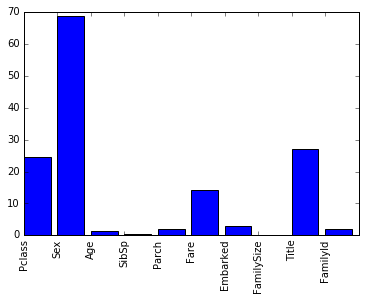

0.83393258427


In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest,f_classif

# Updated predictors with new features extracted.
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

k = 5
# perform feature selection - i.e select k features which are highly correlated with target variable - Survived.
selector = SelectKBest(score_func = f_classif, k = k)
selector.fit(titanic[predictors], titanic.Survived)

# Get raw p_values for each feature and transform them to scores
scores = -np.log10(selector.pvalues_)

x_coordinates = range(len(predictors))
y_coordinates = scores

plt.bar(x_coordinates, y_coordinates)
plt.xticks(x_coordinates, predictors, rotation='vertical') # labels are shown vertical
plt.show()

# 4 top scoring features are selected for training a RandomForest
predictors = ['Pclass', 'Sex', 'Fare', 'Title']

# min_samples_split is the minimum number of rows we need to make a split
# min_samples_leaf is the minimum number of samples we can have at the place where a tree branch ends (the bottom points of the tree)
model = RandomForestClassifier(n_estimators = 25, min_samples_split=8, min_samples_leaf= 4, random_state = 1)

kfold = cross_validation.KFold(n=len(titanic),
                               n_folds = 10,
                               random_state = 1)

scores = cross_validation.cross_val_score(model, titanic[predictors], titanic.Survived, cv = kfold)
print(scores.mean())


In [ ]:
Ensembling  - Gradient Boosting

In [132]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import KFold
import numpy as np

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, 
                                n_estimators=25, 
                                max_depth=3), 
     ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]
    ],
    [LogisticRegression(random_state=1), 
     ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

##### Approach 1 - Averaging probabilities ####
predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

##### Approach 2 - Majority voting ######################
estimators = []
estimators.append(('gbc', GradientBoostingClassifier(random_state=1, 
                                n_estimators=25, 
                                max_depth=3)))
estimators.append(('lr', LogisticRegression(random_state=1)))

predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]
X = titanic[predictors]

from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators)

results = cross_validation.cross_val_score(ensemble, X, titanic.Survived, cv=kf)
print("Voting ensemble, training accuracy mean:{}".format(results.mean()))

######################

0.819304152637
Voting ensemble, training accuracy mean:0.814814814815


## Matching Our Changes On The Test Set

In [133]:
# First, we'll add titles to the test set.
titles = titanic_test["Name"].apply(get_title)
# We're adding the Dona title to the mapping, because it's in the test set, but not the training set
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2, "Dona": 10}
for k,v in title_mapping.items():
    titles[titles == k] = v
titanic_test["Title"] = titles
# Check the counts of each unique title.
print(pandas.value_counts(titanic_test["Title"]))

# Now, we add the family size column.
titanic_test["FamilySize"] = titanic_test["SibSp"] + titanic_test["Parch"]

# Now we can add family ids.
# We'll use the same ids that we did earlier.
print(family_id_mapping)

family_ids = titanic_test.apply(get_family_id, axis=1)
family_ids[titanic_test["FamilySize"] < 3] = -1
titanic_test["FamilyId"] = family_ids

#### Adding NameLength feature to titanic_test ####
# The .apply method generates a new series
titanic_test["NameLength"] = titanic_test.Name.apply(lambda x: len(x))
print(titanic_test.NameLength.head())

1     240
2      79
3      72
4      21
7       2
6       2
10      1
5       1
Name: Title, dtype: int64
{"O'Sullivan0": 426, 'Mangan0': 620, 'Lindqvist1': 543, 'Denkoff0': 297, 'Sincock0': 813, 'Rouse0': 413, 'Berglund0': 207, 'Meo0': 142, 'Arnold-Franchi1': 49, 'Chronopoulos1': 71, 'Skoog5': 63, 'Walcroft0': 897, 'Widener2': 329, 'Pengelly0': 217, 'Goncalves0': 400, 'Andersen0': 829, 'Myhrman0': 626, 'Beane1': 456, 'Moss0': 104, 'Carlsson0': 610, 'Nicholls2': 136, 'Jussila1': 110, 'Jussila0': 483, 'Peltomaki0': 725, 'Long0': 632, 'Cassebeer0': 809, 'Portaluppi0': 858, 'Wheadon0': 33, 'Connolly0': 261, 'Hansen2': 680, 'Stephenson1': 493, 'Howard0': 862, 'Smyth0': 805, 'Davies0': 336, 'Silven2': 359, 'Vanden Steen0': 311, 'Sadowitz0': 878, 'Astor1': 571, 'Patchett0': 480, 'Denbury0': 891, 'Johanson0': 184, 'Coleridge0': 220, 'Christmann0': 87, 'Carter3': 340, 'Compton2': 665, 'Carter1': 226, 'Turkula0': 414, 'Lindeberg-Lind0': 793, 'Hassab0': 558, 'Badman0': 755, 'Aronsson0': 914, 'Sa

## Predicting On The Test Set

In [143]:
predictors = ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title", "FamilyId"]

algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), predictors],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "FamilySize", "Title", "Age", "Embarked"]]
]

full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4

print(predictions[0:5])

###########  Instructions ######
# 1. Turn the predictions into either 0 or 1 by turning the predictions less than or equal to .5 into 0, 
# and the predictions greater than .5 into 1.

predictions[predictions <= 0.5 ] = 0
predictions[predictions > 0.5 ] = 1

print(predictions[0:5])

# 2. Then, convert the predictions to integers using the .astype(int) method -- if you don't, 
# Kaggle will give you a score of 0.

predictions = predictions.astype(int)
print(predictions[0:5])

# 3. Finally, create a submission dataframe where the first column is PassengerId, and the second column 
# is Survived (this will be the predictions).
######################

submission = pandas.DataFrame({
    'PassengerId' : titanic_test["PassengerId"],
    'Survived'    : predictions
})

submission.to_csv("kaggle_mshabeer_titanic_test_results_submission_improved.csv" , index=False)
print(submission)


[ 0.11905703  0.50546179  0.12405561  0.1300521   0.51102313]
[ 0.  1.  0.  0.  1.]
[0 1 0 0 1]
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         1
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
..           ...       ...
388         1280         0
389         1